# Data Analysis & Machine Learning Part

In [51]:
import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Connection String

serverName = "sqlserver-pw.database.windows.net" 
databaseName = "db-ai"
username = "girls"
password = "Password?"

In [53]:
# Make the conncection to our Server

connection_string = f'DRIVER={{SQL Server}};SERVER='+serverName+';DATABASE='+databaseName+';UID='+username+';PWD='+ password

cnxn = pyodbc.connect(connection_string)
cursor = cnxn.cursor()

In [54]:
#Splitting the Dataset based on the value of BEP 

# We keep only the data with BEP = 1

query_1 = "SELECT  Canale, CodAgenzia,ClusterAgenzia, CodContratto,CategoriaCespite, Cespite, TipologiaUtenza,[DataTrasf.entr.], Anagrafica,SettoreMerceologico, ListinoProposto, [Soc.Vend.Prec.],ClusterSocVend,Localita, [Cod.ISTAT], Provincia,RegioneItaliana, Zona, ModoPagamento, RedditoTotale, Mese01,MesiBEP,MesiAttivi, UltimoReddito FROM try.DatiConsumi_ML WHERE BEP = 1"


## Exploratory Data Analysis


In [55]:
#Load the dataset into a pandas DataFrame

df_1 = pd.read_sql(query_1, cnxn)


C:\Users\IreneDeNevi\AppData\Local\Temp\ipykernel_28924\3709247905.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1 = pd.read_sql(query_1, cnxn)


In [56]:
# Displaying information about the dataframe

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134966 entries, 0 to 134965
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Canale               134966 non-null  object 
 1   CodAgenzia           134966 non-null  object 
 2   ClusterAgenzia       134966 non-null  object 
 3   CodContratto         134966 non-null  object 
 4   CategoriaCespite     134966 non-null  object 
 5   Cespite              134966 non-null  object 
 6   TipologiaUtenza      134966 non-null  object 
 7   DataTrasf.entr.      134966 non-null  object 
 8   Anagrafica           134966 non-null  object 
 9   SettoreMerceologico  134966 non-null  object 
 10  ListinoProposto      134966 non-null  object 
 11  Soc.Vend.Prec.       134868 non-null  object 
 12  ClusterSocVend       134966 non-null  object 
 13  Localita             134966 non-null  object 
 14  Cod.ISTAT            134966 non-null  object 
 15  Provincia        

In [57]:
# Checking for missing values in the dataframe

df_1.isnull().sum()

Canale                  0
CodAgenzia              0
ClusterAgenzia          0
CodContratto            0
CategoriaCespite        0
Cespite                 0
TipologiaUtenza         0
DataTrasf.entr.         0
Anagrafica              0
SettoreMerceologico     0
ListinoProposto         0
Soc.Vend.Prec.         98
ClusterSocVend          0
Localita                0
Cod.ISTAT               0
Provincia               0
RegioneItaliana         0
Zona                    0
ModoPagamento           0
RedditoTotale           0
Mese01                  0
MesiBEP                 0
MesiAttivi              0
UltimoReddito           0
dtype: int64

In [58]:
# Dropping rows with missing values in the Soc.Vend.Prec. column

df_1.dropna(subset=["Soc.Vend.Prec."], inplace=True)

In [59]:
df_1['Year_Trasf.entr.'] = pd.to_datetime(df_1['DataTrasf.entr.']).dt.year
df_1['Month_Trasf.entr.'] = pd.to_datetime(df_1['DataTrasf.entr.']).dt.month
df_1['Day_Trasf.entr.'] = pd.to_datetime(df_1['DataTrasf.entr.']).dt.day
df_1.drop(['DataTrasf.entr.'],axis=1,inplace=True) 

In [60]:
 # Converting columns from object to integer type

int_columns = ["Canale", "CodAgenzia", "ClusterAgenzia", "CodContratto", "Cespite",  "Anagrafica", "SettoreMerceologico", "ListinoProposto", "Soc.Vend.Prec.", "ClusterSocVend", "Localita", "Provincia", "RegioneItaliana", "Zona", "ModoPagamento", "UltimoReddito"]
df_1[int_columns] = df_1[int_columns].astype(int)

In [61]:
# Displaying descriptive statistics of the DataFrame

df_1.describe()
 

,Canale,CodAgenzia,ClusterAgenzia,CodContratto,Cespite,Anagrafica,SettoreMerceologico,ListinoProposto,Soc.Vend.Prec.,ClusterSocVend,...,Zona,ModoPagamento,RedditoTotale,Mese01,MesiBEP,MesiAttivi,UltimoReddito,Year_Trasf.entr.,Month_Trasf.entr.,Day_Trasf.entr.
count,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,...,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000,134868.000000
mean,4.452257,1.921115,2.449180,237022.350016,3.571322,57.379104,1.352471,6.234533,263.013665,2.940297,...,2.373017,1.796972,112.176333,-95.134135,14.790929,31.940075,106.422094,2017.229424,6.283655,1.001142
std,1.328615,1.934512,1.619436,134640.726551,0.634107,22.992324,0.477741,2.042601,136.652459,1.370215,...,0.674646,0.956910,113.113342,40.931439,7.005416,15.215921,100.020136,1.745076,3.295324,0.133394
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,-174.200000,0.000000,1.000000,-2.000000,2015.000000,1.000000,1.000000
25%,4.000000,1.000000,1.000000,118200.000000,3.000000,47.000000,1.000000,6.000000,254.000000,3.000000,...,2.000000,1.000000,30.010000,-120.100000,12.000000,20.000000,30.000000,2016.000000,4.000000,1.000000
50%,4.000000,1.000000,2.000000,258610.500000,4.000000,61.000000,1.000000,7.000000,256.000000,3.000000,...,2.000000,1.000000,72.360000,-109.200000,15.000000,27.000000,72.000000,2017.000000,6.000000,1.000000
75%,6.000000,2.000000,4.000000,353040.250000,4.000000,74.000000,2.000000,7.000000,257.000000,3.000000,...,3.000000,3.000000,155.250000,-67.700000,17.000000,42.000000,155.000000,2019.000000,9.000000,1.000000
max,7.000000,9.000000,5.000000,474916.000000,5.000000,99.000000,2.000000,9.000000,751.000000,7.000000,...,3.000000,3.000000,591.100000,2.800000,59.000000,60.000000,499.000000,2020.000000,12.000000,26.000000


C:\Users\IreneDeNevi\AppData\Local\Temp\ipykernel_28924\1928049779.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_1.corr()


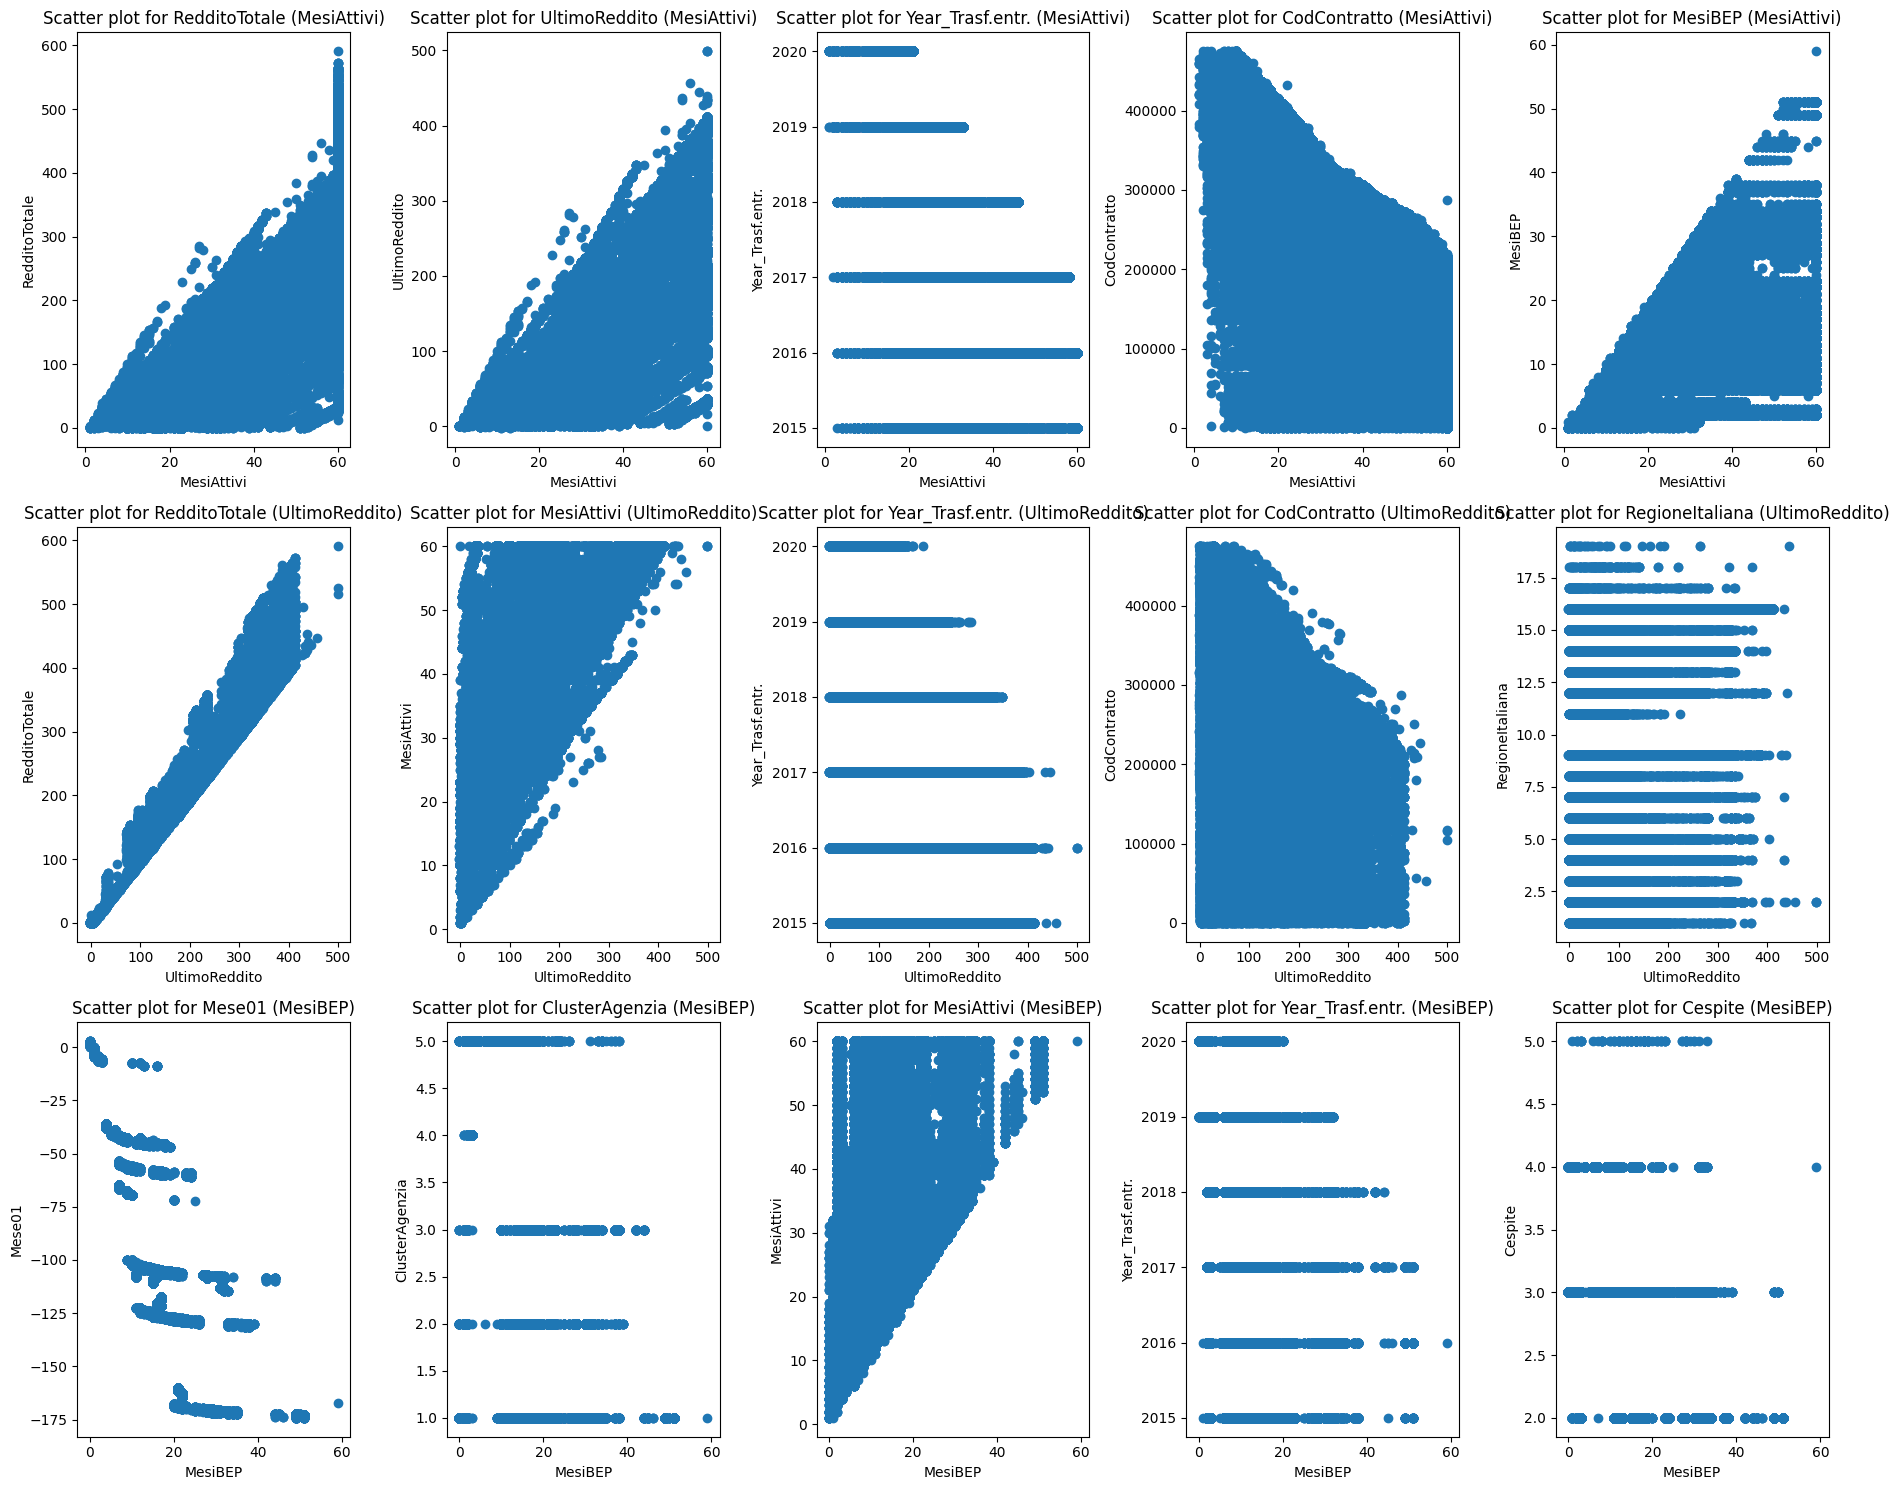

In [62]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_1.corr()

# List of target variables
targets = ['MesiAttivi', 'UltimoReddito', 'MesiBEP']

# Number of top features to consider
num_top_features = 5  # Adjust as needed

# Create subplots
fig, axs = plt.subplots(len(targets), num_top_features, figsize=(18.5, 5 * len(targets)))

# Iterate through target variables
for i, target_variable in enumerate(targets):
    # Sort features based on their correlation with the current target variable
    sorted_features = correlation_matrix[target_variable].abs().sort_values(ascending=False).index
    
    # Select the top features (excluding the target variable itself)
    top_features = sorted_features[1:num_top_features + 1]

    # Iterate through the top features for the current target variable
    for j, feature in enumerate(top_features):
        ax = axs[i, j] if len(targets) > 1 else axs[j]
        ax.scatter(df_1[target_variable], df_1[feature])
        ax.set_xlabel(target_variable)
        ax.set_ylabel(feature)
        ax.set_title(f'Scatter plot for {feature} ({target_variable})')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Set a correlation threshold
threshold = 0.7

# Create a mask to hide the upper triangle of the heatmap (to avoid duplication)
mask = correlation_matrix.abs() < threshold

# Apply the mask to hide values below the threshold
filtered_corr_matrix = correlation_matrix.mask(mask)

# Create a heatmap
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the plot title
plt.title('Correlation matrix (Above Threshold)')

# Show the plot
plt.show()

## Machine Learning Part

Unsuitable models were subsequently commented on to improve the performance of the Gradient Boosting Regressor.

According to our assumptions, we tried to optimise the hyper-parameters of the ML model that we thought were best for our data.

In [63]:
# Import necessary libraries to do ML

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score,max_error

In [64]:
# Define the models

models = {
    #'LinearRegression' : LinearRegression(),
    # 'Ridge' :   Ridge(solver='auto'),
    'GradientBoostingRegressor' : GradientBoostingRegressor()
    # 'Lasso' :   Lasso(alpha=0.2),
    # 'DecisionTreeRegressor' : DecisionTreeRegressor(),
    # 'RandomForestRegressor': RandomForestRegressor(),
    # 'KNeighborsRegressor': KNeighborsRegressor(algorithm='auto')
}

In [65]:
# Create a dictionary to store predictions for each model
predictions_dict = {}

In [66]:
# Function to plot learning curve
def plot_learning_curve(model, X_train, y_train, target, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.5, 0.75, 6)
    )

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, '-o', label='Train')
    plt.plot(train_sizes, test_scores_mean, '-o', label='Test')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Learning Curve - {model_name} - Target: {target}')
    plt.legend()
    plt.show()



MesiAttivi - GradientBoostingRegressor Mean Squared Error: 2.6921343043630133
MesiAttivi - GradientBoostingRegressor R2 score: 0.9884111691976374
MesiAttivi - GradientBoostingRegressor Explained Variance Score: 0.9884111825765719
MesiAttivi - GradientBoostingRegressor Max Error: 38.69970860981552


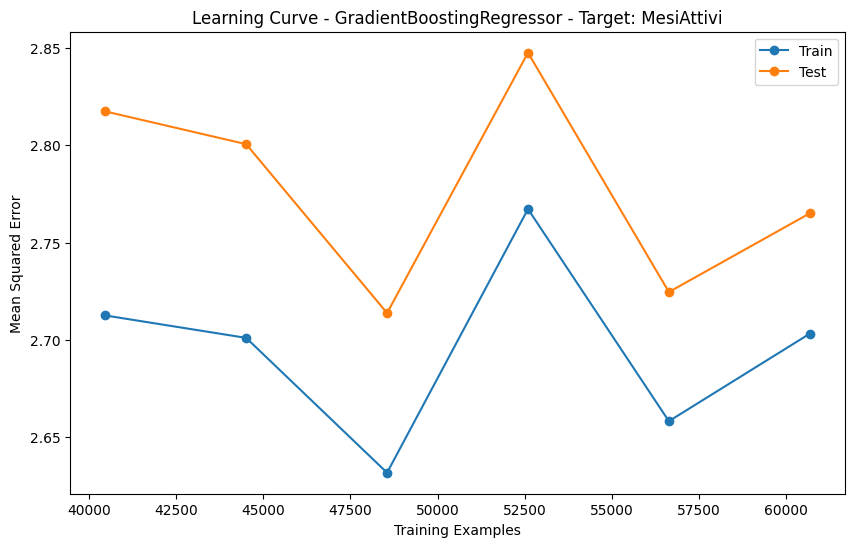

UltimoReddito - GradientBoostingRegressor Mean Squared Error: 11.31197631459066
UltimoReddito - GradientBoostingRegressor R2 score: 0.9988747439117338
UltimoReddito - GradientBoostingRegressor Explained Variance Score: 0.998874778058187
UltimoReddito - GradientBoostingRegressor Max Error: 67.25747545089791


In [67]:
# Loop over targets
for target in targets:
    y_1 = df_1[target]
    features_to_exclude = [target]
    X_1 = df_1.drop(features_to_exclude, axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if name not in predictions_dict:
            predictions_dict[name] = []

        predictions_dict[name].extend(y_pred)

        mse, r2, explained_variance, max_err = (
            mean_squared_error(y_test, y_pred),
            r2_score(y_test, y_pred),
            explained_variance_score(y_test, y_pred),
            np.max(np.abs(y_test - y_pred)),
        )

        print(f"{target} - {name} Mean Squared Error: {mse}")
        print(f"{target} - {name} R2 score: {r2}")
        print(f"{target} - {name} Explained Variance Score: {explained_variance}")
        print(f"{target} - {name} Max Error: {max_err}")

        plot_learning_curve(model, X_train, y_train, target, name)

## Saving the results for BI Part


In [ ]:
from sqlalchemy import create_engine

In [ ]:
# Loop through models to create separate tables for each
for model_name, y_pred_values in predictions_dict.items():
    if len(y_pred_values) != len(targets):
        raise ValueError(f"Length mismatch for model {model_name}: {len(y_pred_values)} values, {len(targets)} targets")

    engine = create_engine(connection_string)  # Replace 'your_database_connection_string_here' with your actual connection string
    
    table_name = f'{model_name}_predictions'
    
    df_model_predictions = pd.DataFrame({target: y_pred_values[i] for i, target in enumerate(targets)})
    
    df_model_predictions.to_sql(table_name, engine, index=False, if_exists='replace')

# Close the database connection (if applicable)
engine.dispose()

AttributeError: 'pyodbc.Connection' object has no attribute 'open'

NameError: name 'pd' is not defined

NameError: name 'cnxn' is not defined